* Project : Phishing Website Detection
* Name    : Ye Htut
* ID      : 3174752K
# Introduction


# Import necessary library

In [3]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00


In [4]:
# Import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss

# EDA

In [5]:
# Import data and Exploratory Data Analysis
data_link = 'https://raw.githubusercontent.com/JimmyYehtut/ITI105Files/main/dataset_phishing.csv'
df = pd.read_csv(data_link)
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [9]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [10]:
labels_count = df['status'].value_counts()
print(labels_count)

status
legitimate    5715
phishing      5715
Name: count, dtype: int64


In [11]:
# Check the status (lable)
print(df['status'].value_counts())
# Convert status (label) into 0 and 1 by creating mapping dictionary
label_mapping = {'legitimate': 0, 'phishing': 1}
df['status'] = df['status'].map(label_mapping)
print(df['status'].value_counts())

status
legitimate    5715
phishing      5715
Name: count, dtype: int64
status
0    5715
1    5715
Name: count, dtype: int64


In [12]:
print(df['status'].value_counts())

status
0    5715
1    5715
Name: count, dtype: int64


In [13]:
# Check for missing values
print(df.isnull().sum())

# Check the data types of each column
print(df.dtypes)

# Check the distribution of the target variable
print(df['status'].value_counts())

df_numeric = df.select_dtypes(include=[np.number])
# df_numeric = df_numeric.drop('status', axis=1)
df_non_numeric = df.select_dtypes(exclude=[np.number])

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64
url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status              int64
Length: 89, dtype: object
status
0    5715
1    5715
Name: count, dtype: int64


In [14]:
print(df_non_numeric.shape)
print(df_numeric.shape)
print(df_non_numeric.columns)
print(df_numeric.columns)

(11430, 1)
(11430, 88)
Index(['url'], dtype='object')
Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 

In [15]:
# Select null or missing value column

null_columns = df.columns[df.isnull().any()]
print(null_columns)

print(df[null_columns].isnull().sum())

print(df['nb_or'])

Index([], dtype='object')
Series([], dtype: float64)
0        0
1        0
2        0
3        0
4        0
        ..
11425    0
11426    0
11427    0
11428    0
11429    0
Name: nb_or, Length: 11430, dtype: int64


In [16]:
df_numeric.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


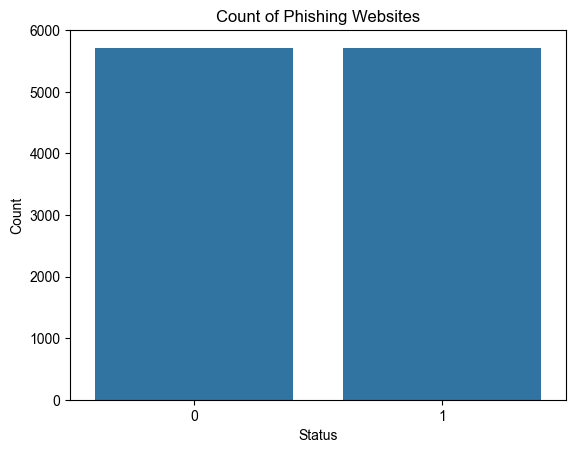

In [17]:
sns.countplot(x='status', data=df)
sns.set_style('whitegrid')
plt.title('Count of Phishing Websites')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

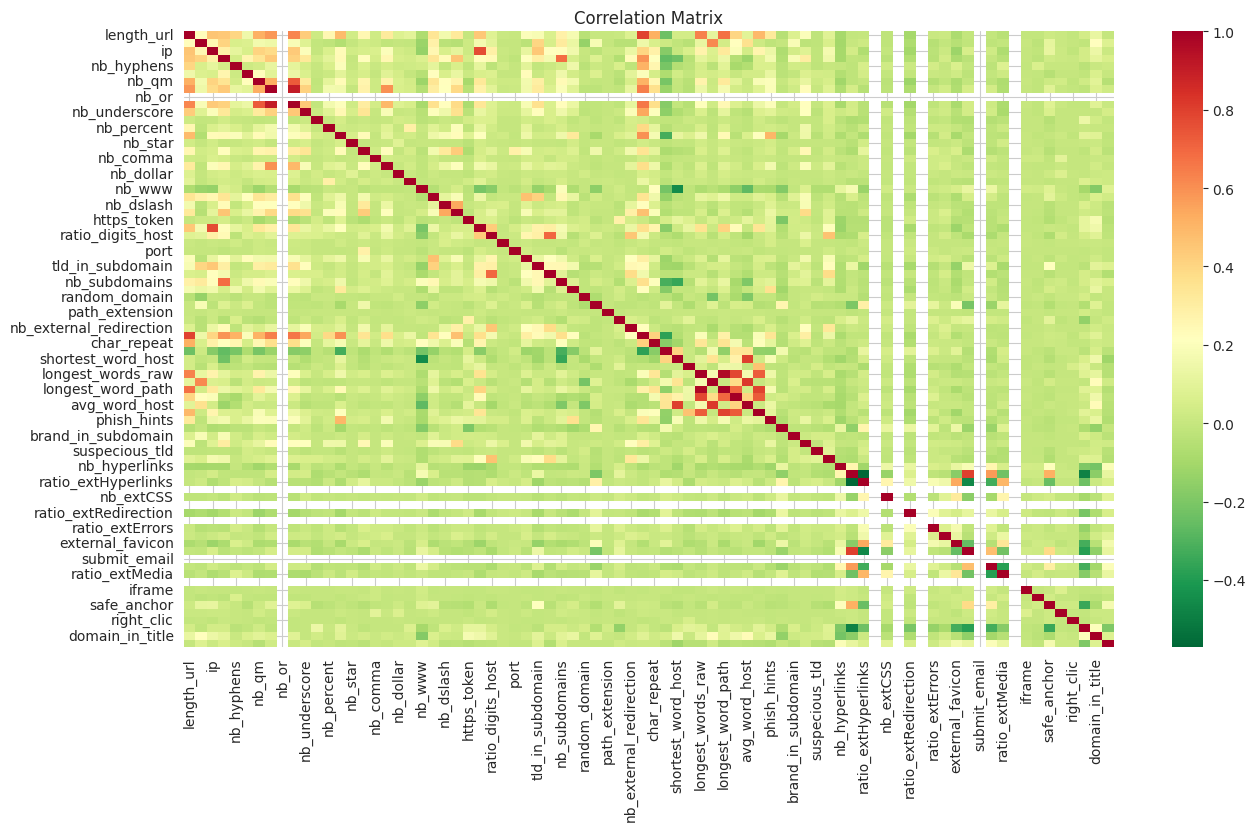

In [13]:
# Correlation
plt.figure(figsize=(15, 8))
# df_numeric_first20 = df_numeric.iloc[:, :20]
sns.heatmap(df_numeric.iloc[:,:80].corr(), annot=False, fmt='.2f', cmap='RdYlGn_r')
plt.title('Correlation Matrix')
plt.show()

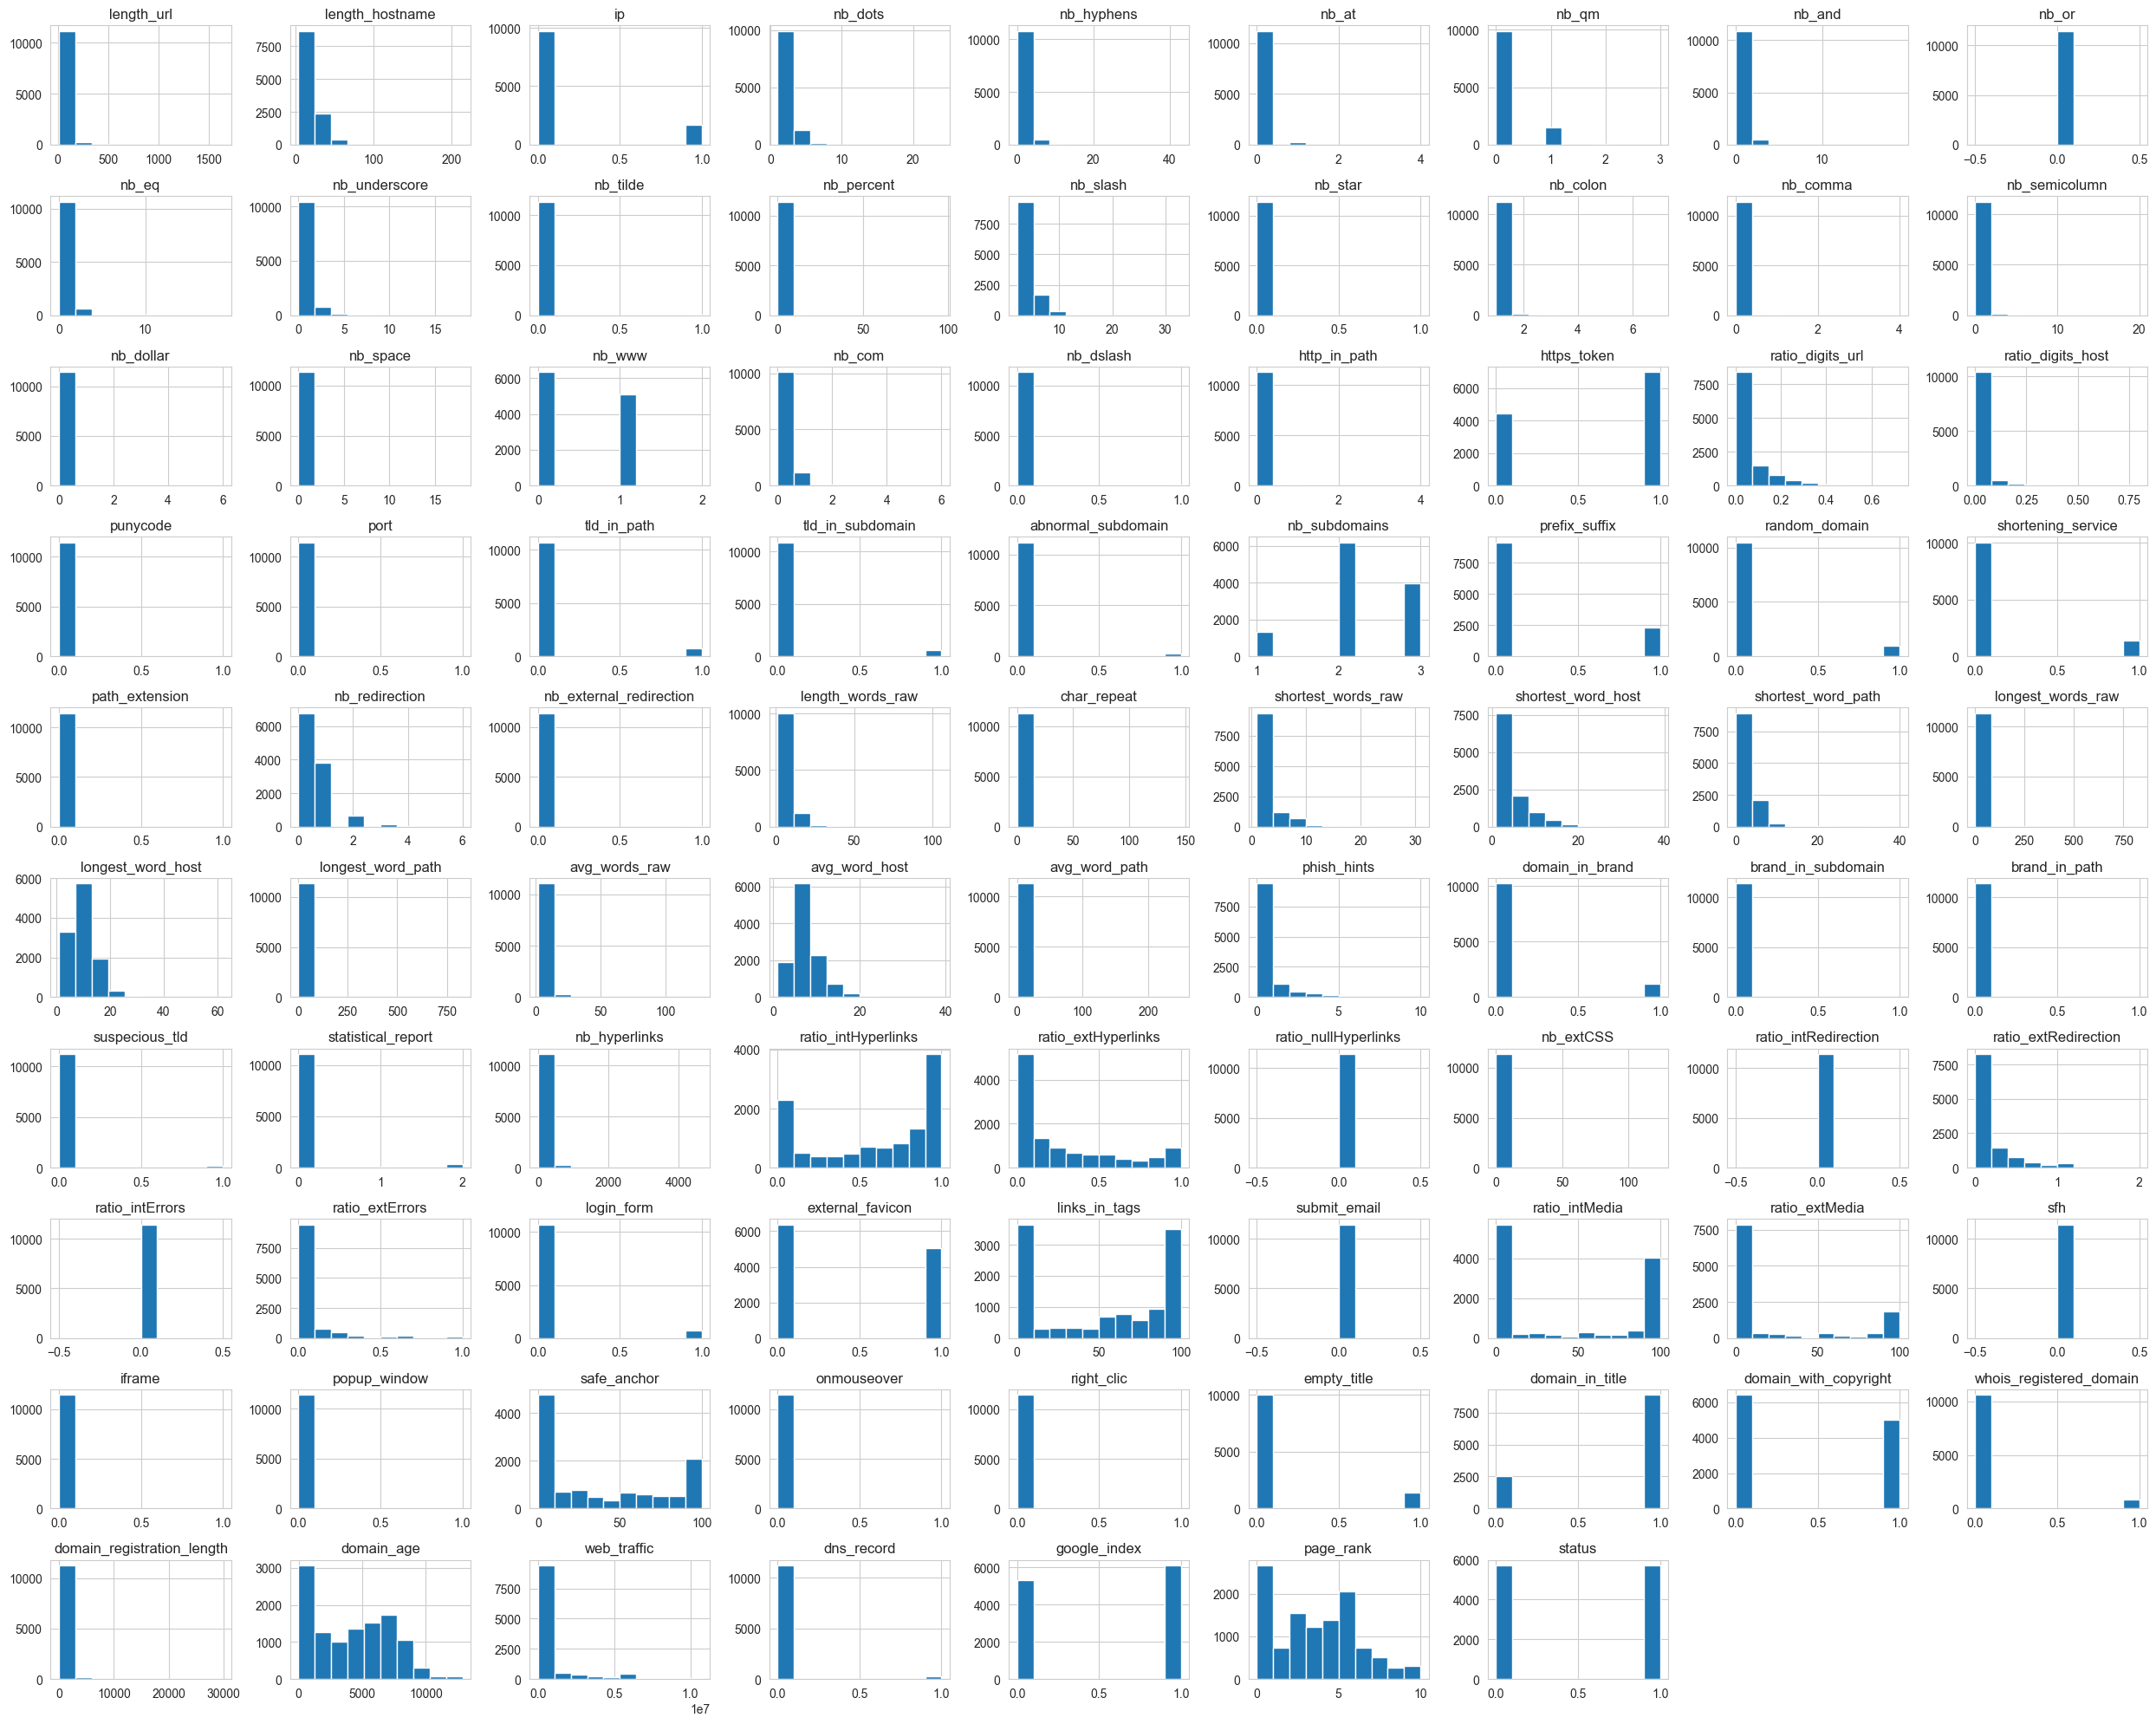

In [18]:
# Histogram of df_numeric

df_numeric.hist(figsize=(25, 20))
plt.tight_layout()
plt.show()


# Randomforest Model

In [19]:
corr_matrix = df.corr(numeric_only=True)
target_correlation = corr_matrix['status']
print(target_correlation[:5])

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
Name: status, dtype: float64


In [16]:
print(df_numeric.columns)

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [20]:
# Preparation before model training
X = df_numeric.drop('status', axis=1)
y = df_numeric['status']
print(X.shape)
print(y.shape)

(11430, 87)
(11430,)


In [22]:
# Randomforest model trainig

train_test_split(df_numeric, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
# rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = RandomForestClassifier(oob_score=True, random_state=42,warm_start=True,n_jobs=-1)

oob_list = list()

# Iterate through a range of numbers of trees
for n_trees in [10, 50, 100, 500, 600, 800, 1000, 1100, 1200, 1300, 1400, 1500]:
    # Use this to set the number of trees
    rf_clf.set_params(n_estimators=n_trees)

    # Fit the model
    rf_clf.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - rf_clf.oob_score_

    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob

# rf_clf.fit(X_train, y_train)

C:\Users\ye.htut\AppData\Local\miniconda3\envs\StreamlitEnv\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
10.0,0.070991
50.0,0.038745
100.0,0.037245
500.0,0.035121
600.0,0.034496
800.0,0.034621
1000.0,0.034746
1100.0,0.034621
1200.0,0.034746


*  The error appears to have stabilized from around 600 trees
*  Plot the graph for easy visualizatio

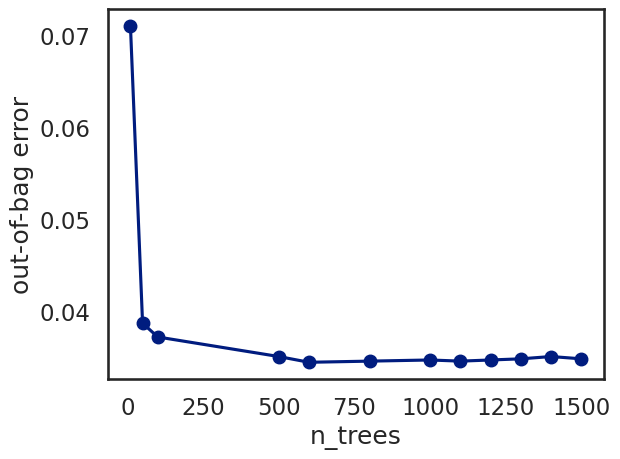

In [19]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

In [30]:
# Random forest with 1100 estimators
rf_clf = rf_clf.set_params(n_estimators=600)

In [31]:
# define a measure_error function for summarize various errors together
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [26]:
# prompt: take only the feature importance value >0

# Get feature importances
importances = rf_clf.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Filter for features with importance greater than 0
important_features = feature_importances[feature_importances['importance'] > 0]
important_features2 = pd.DataFrame(important_features)
#print(important_features)
important_features2

,feature,importance
85,google_index,1.714864e-01
86,page_rank,9.829850e-02
56,nb_hyperlinks,8.635107e-02
83,web_traffic,7.715021e-02
20,nb_www,4.530847e-02
...,...,...
38,nb_external_redirection,4.177877e-06
18,nb_dollar,3.194211e-06
14,nb_star,1.051803e-06
36,path_extension,4.952275e-07


In [32]:
df_numeric.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

google_index            0.171486
page_rank               0.098299
nb_hyperlinks           0.086351
web_traffic             0.077150
nb_www                  0.045308
                          ...   
ratio_intErrors         0.000000
ratio_intRedirection    0.000000
ratio_nullHyperlinks    0.000000
nb_or                   0.000000
submit_email            0.000000
Length: 87, dtype: float64


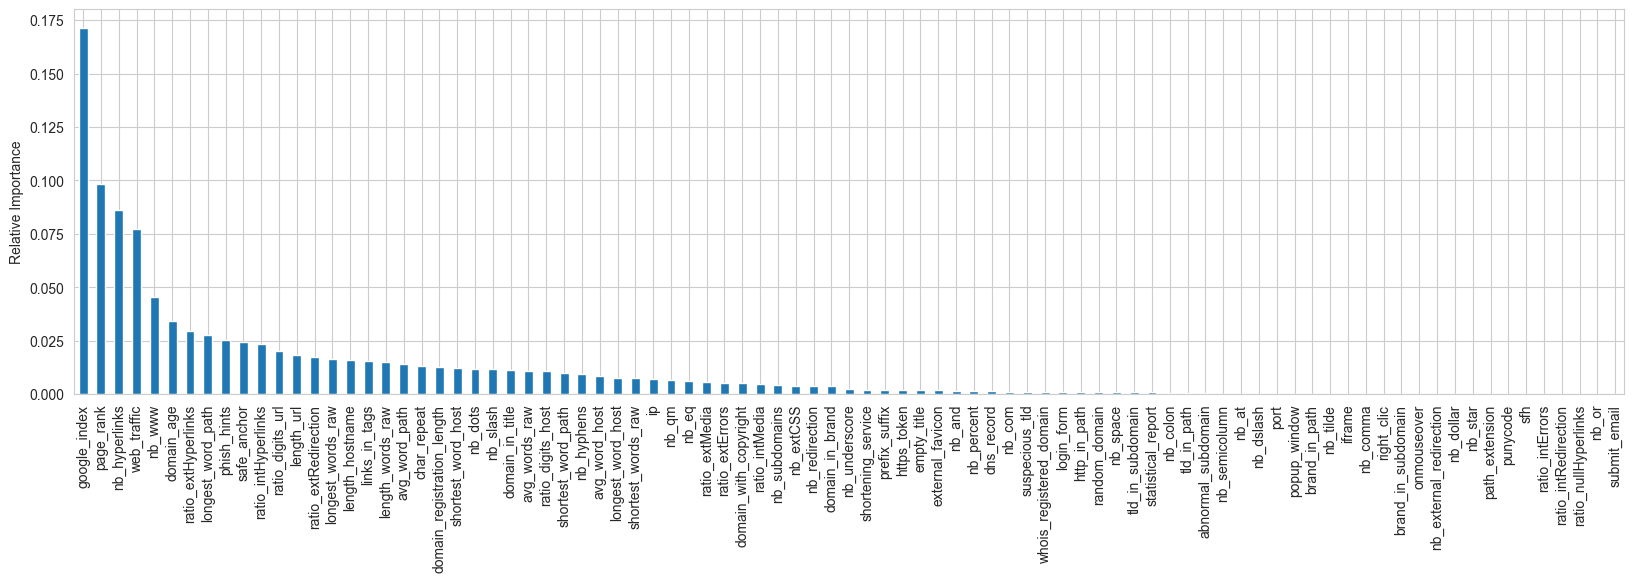

In [33]:
features_used_in_training = df_numeric.drop('status', axis=1).columns 
feature_imp = pd.Series(rf_clf.feature_importances_, index=features_used_in_training).sort_values(ascending=False,)

print(feature_imp)
fig = plt.figure(figsize=(20,5))
ax = feature_imp.plot(kind='bar')
ax.set(ylabel='Relative Importance');

In [24]:
# Randomforest model validation and performance
y_pred = rf_clf.predict(X_test)


In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 96.85%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1732
           1       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



In [28]:
import pickle
filename="Random_Forest.pkl"
pickle.dump(rf_clf,open(filename,'wb'))

In [34]:
# Example saving process during training
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scalar, f)

with open('rf_clf.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

In [29]:
# Testing
loaded_model = pickle.load(open('Random_Forest.sav', 'rb'))
prediction = loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 96.85%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1732
           1       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



In [ ]:
rf_Accuracy_Score = accuracy_score(y_test,y_pred)
rf_JaccardIndex = jaccard_score(y_test,y_pred)
rf_F1_Score = f1_score(y_test,y_pred)
rf_Log_Loss = log_loss(y_test,y_pred)

In [ ]:
print(f"Accuracy: {rf_Accuracy_Score}")
print(f"Jaccard Index: {rf_JaccardIndex}")
print(f"F1 Score: {rf_F1_Score}")
print(f"Log Loss: {rf_Log_Loss}")

In [ ]:
importances = rf_clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False).head(20))


In [ ]:
# SVM model validation and performance
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
print(rf_confusion_matrix)

In [ ]:
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Randomforest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
rf_report = classification_report(y_test, y_pred)
print(rf_report)

# SVM Model

# Training SVM model with Linear kernal
* Kernel = linear
* C = 1
* Probability = True


SVM with kernel functions



In [ ]:
# SVM model training
svm = SVC(kernel='linear', C=1, probability = True)
# svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(X_train, y_train)

# Prediction SVM model

In [ ]:
svm_predict = svm.predict(X_test)

# Accuracy Score comparison

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_predict)
print(f'Accuracy: {svm_accuracy * 100:.2f}%')

In [ ]:
svm_Accuracy_Score = accuracy_score(y_test,svm_predict)
svm_JaccardIndex = jaccard_score(y_test,svm_predict)
svm_F1_Score = f1_score(y_test,svm_predict)
svm_Log_Loss = log_loss(y_test,svm_predict)

In [ ]:
print(f"Accuracy: {svm_Accuracy_Score}")
print(f"Jaccard Index: {svm_JaccardIndex}")
print(f"F1 Score: {svm_F1_Score}")
print(f"Log Loss: {svm_Log_Loss}")

# SVM Confusion Matrix and plotting a heatmap

In [ ]:
svm_confusion_matrix = confusion_matrix(y_test, svm_predict)
print(svm_confusion_matrix)

In [ ]:
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve for Randomforest and SVM model
The ROC curve shows the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) for different threshold settings.
By plotting the ROC curves for both models on the same graph, we can visually compare their performance. The model with a curve that is closer to the top-left corner (high TPR and low FPR) is generally better.

In [ ]:
# Calculate ROC curves and AUC scores
from sklearn.metrics import roc_curve, roc_auc_score
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
svm_probs = svm.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

In [ ]:
# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='red', label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest and SVM Models')
plt.legend()
plt.show()

print(f'Random Forest AUC: {rf_auc}')
print(f'SVM AUC: {svm_auc}')

In [ ]:
# Define thresholds
thresholds = np.linspace(0, 1, 100)

# Calculate accuracy for each threshold
rf_accuracies = []
svm_accuracies = []

for threshold in thresholds:
    rf_pred = (rf_probs >= threshold).astype(int)
    rf_accuracies.append(accuracy_score(y_test, rf_pred))

    svm_pred = (svm_probs >= threshold).astype(int)
    svm_accuracies.append(accuracy_score(y_test, svm_pred))

# Plot the accuracy vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rf_accuracies, label='Random Forest', color='blue')
plt.plot(thresholds, svm_accuracies, label='SVM', color='red')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold for Random Forest and SVM Models')
plt.legend()
plt.show()